#                                    House Price prediction

## Business case: Based on the given features, we need to predict the house price.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1. ANALYZING AND CLEANING DATA:

In [3]:
data=pd.read_csv('C:\\Users\\munal\\Downloads\\PRCP-1020-HousePricePred\\Data\\data.csv')
print("Table Shape: {}".format(data.shape)) 

Table Shape: (1460, 81)


In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. BASIC CHECKS:

In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
null_class = data.isnull().sum() 
print(null_class [null_class != 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
def preprocess(df, train_data=True):
    drop_rows_list = ["MasVnrType", "MasVnrArea", "Electrical"]
    if train_data:
        # Drop NaN rows
        for sample_row in drop_rows_list:
            df.drop(df[df[sample_row].isnull()].index, inplace=True)

    # Replace NaN with the most common value
    most_common_list = ["BsmtQual", "BsmtCond", "BsmtExposure","BsmtFinType1", "BsmtFinType2", 
                        "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]
    for sample_row in most_common_list:
        df[sample_row].fillna(df[sample_row].mode()[0], inplace=True)

    # Replace NaN with Mean  
    df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)

    # Remove some unecessary columns
    removed_features_list = ["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu", "Id"]
    for feature in removed_features_list:
        del df[feature]
    
    if not train_data:
        # Replace NaN with the  most common value for test set 
        for sample_row in test_set.isnull().columns:
            df[sample_row].fillna(df[sample_row].mode()[0], inplace=True)
            
    return df

def preprocess_no_obj_feature(df, train_data=True):
    drop_rows_list = ["MasVnrType", "MasVnrArea", "Electrical"]
    if train_data:
        # Drop NaN rows
        for sample_row in drop_rows_list:
            df.drop(df[df[sample_row].isnull()].index, inplace=True)

    # Replace NaN with the most common value
    most_common_list = ["BsmtQual", "BsmtCond", "BsmtExposure","BsmtFinType1", "BsmtFinType2", 
                        "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond"]
    for sample_row in  data.select_dtypes(include=['object']).columns:
        df[sample_row].fillna(df[sample_row].mode()[0], inplace=True)

    # Replace NaN with Mean  
    df.LotFrontage.fillna(df.LotFrontage.mean(), inplace=True)
    
    # Remove some unecessary columns
    removed_features_list = ["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu", "Id"]
    for feature in removed_features_list:
        del df[feature]
        
    # Delete all remaining object features
    for feature in df.select_dtypes(include=['object']).columns:
        del df[feature]
    
    if not train_data:
        # Replace NaN with the  most common value for test set 
        for sample_row in test_set.isnull().columns:
            df[sample_row].fillna(df[sample_row].mode()[0], inplace=True)
            
    return df

# We can choose 1 of 2 preprocess methods.
# data = preprocess(data, train_data=True) # This preprocess for using object features
data = preprocess_no_obj_feature(data, train_data=True) # Do not use object features

In [10]:
data.describe() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,70.027638,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,...,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,42.350366,22.040935,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,...,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,70.027638,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3. DOMAIN ANALYSIS:

Analyzing the domain of features is a crucial step in understanding your dataset, especially in the context of machine learning 
or data analysis. It helps you gain insights into the meaning and significance of each feature. Below is a brief domain 
analysis for each of the features you've listed in a typical housing dataset:

1. **Id**: This is usually an identifier for each data point and may not provide valuable information for predictive modeling.
    It's often used for data management.

2. **MSSubClass**: Represents the type of dwelling (e.g., one-story, two-story, etc.). It's a categorical feature.

3. **MSZoning**: Describes the general zoning classification of the property (e.g., residential, commercial).

4. **LotFrontage**: The linear feet of street connected to the property. It's a numerical feature representing the width of the 
    lot.

5. **LotArea**: The lot size in square feet.

6. **Street**: Type of road access to the property (e.g., paved, gravel).

7. **Alley**: Type of alley access to the property.

8. **LotShape**: General shape of the lot (e.g., regular, irregular).

9. **LandContour**: Flatness of the property (e.g., level, banked).

10. **Utilities**: Availability of utilities (e.g., electricity, gas, water).

11. **LotConfig**: Lot configuration (e.g., inside, corner, cul-de-sac).

12. **LandSlope**: Slope of the property.

13. **Neighborhood**: Neighborhood location.

14. **Condition1** and **Condition2**: Proximity to various conditions (e.g., near a railroad, park, etc.).

15. **BldgType**: Type of dwelling (e.g., single-family, duplex).

16. **HouseStyle**: Style of dwelling (e.g., ranch, colonial).

17. **OverallQual**: Overall material and finish quality (usually on a scale of 1-10).

18. **OverallCond**: Overall condition rating (usually on a scale of 1-10).

19. **YearBuilt**: Year the house was built.

20. **YearRemodAdd**: Year the house was remodeled or renovated.

21. **RoofStyle** and **RoofMatl**: Roof type and material.

22. **Exterior1st** and **Exterior2nd**: Exterior covering on house.

23. **MasVnrType** and **MasVnrArea**: Masonry veneer type and area in square feet.

24. **ExterQual** and **ExterCond**: Exterior material quality and condition.

25. **Foundation**: Type of foundation.

26. **BsmtQual**, **BsmtCond**, **BsmtExposure**, **BsmtFinType1**, **BsmtFinSF1**, **BsmtFinType2**, **BsmtFinSF2**,
**BsmtUnfSF**, and **TotalBsmtSF**: Basement-related features including quality, condition, exposure, finished area, 
and unfinished area.
 
27. **Heating** and **HeatingQC**: Type of heating and heating quality.

28. **CentralAir**: Whether the house has central air conditioning.

29. **Electrical**: Electrical system.

30. **1stFlrSF**, **2ndFlrSF**, **LowQualFinSF**, and **GrLivArea**: Square footage of different parts of the house.

31. **BsmtFullBath**, **BsmtHalfBath**, **FullBath**, and **HalfBath**: Number of bathrooms.

32. **BedroomAbvGr**, **KitchenAbvGr**, and **KitchenQual**: Number of bedrooms, kitchens, and kitchen quality.

33. **TotRmsAbvGrd**: Total rooms above ground (excluding bathrooms).

34. **Functional**: Home functionality rating.

35. **Fireplaces** and **FireplaceQu**: Number of fireplaces and fireplace quality.

36. **GarageType**, **GarageYrBlt**, **GarageFinish**, **GarageCars**, **GarageArea**, **GarageQual**, and **GarageCond**:
Garage-related features including type, year built, finish, capacity, area, quality, and condition.

37. **PavedDrive**: Paved driveway.

38. **WoodDeckSF**, **OpenPorchSF**, **EnclosedPorch**, **3SsnPorch**, **ScreenPorch**: Porch and deck features.

39. **PoolArea** and **PoolQC**: Pool-related features including area and quality.

40. **Fence**: Fence quality.

41. **MiscFeature** and **MiscVal**: Miscellaneous features and their value.

42. **MoSold** and **YrSold**: Month and year sold.

43. **SaleType**: Type of sale.

44. **SaleCondition**: Condition of sale.

45. **SalePrice**: The target variable, the sale price of the house.

Some features may have a stronger impact on the target variable (e.g., SalePrice), while others may have a weaker or indirect 
influence. Domain knowledge can help you identify which features are most relevant for your analysis or modeling.

### 4. EXAMINING AND EXPLORATORY DATA ANALYSIS:

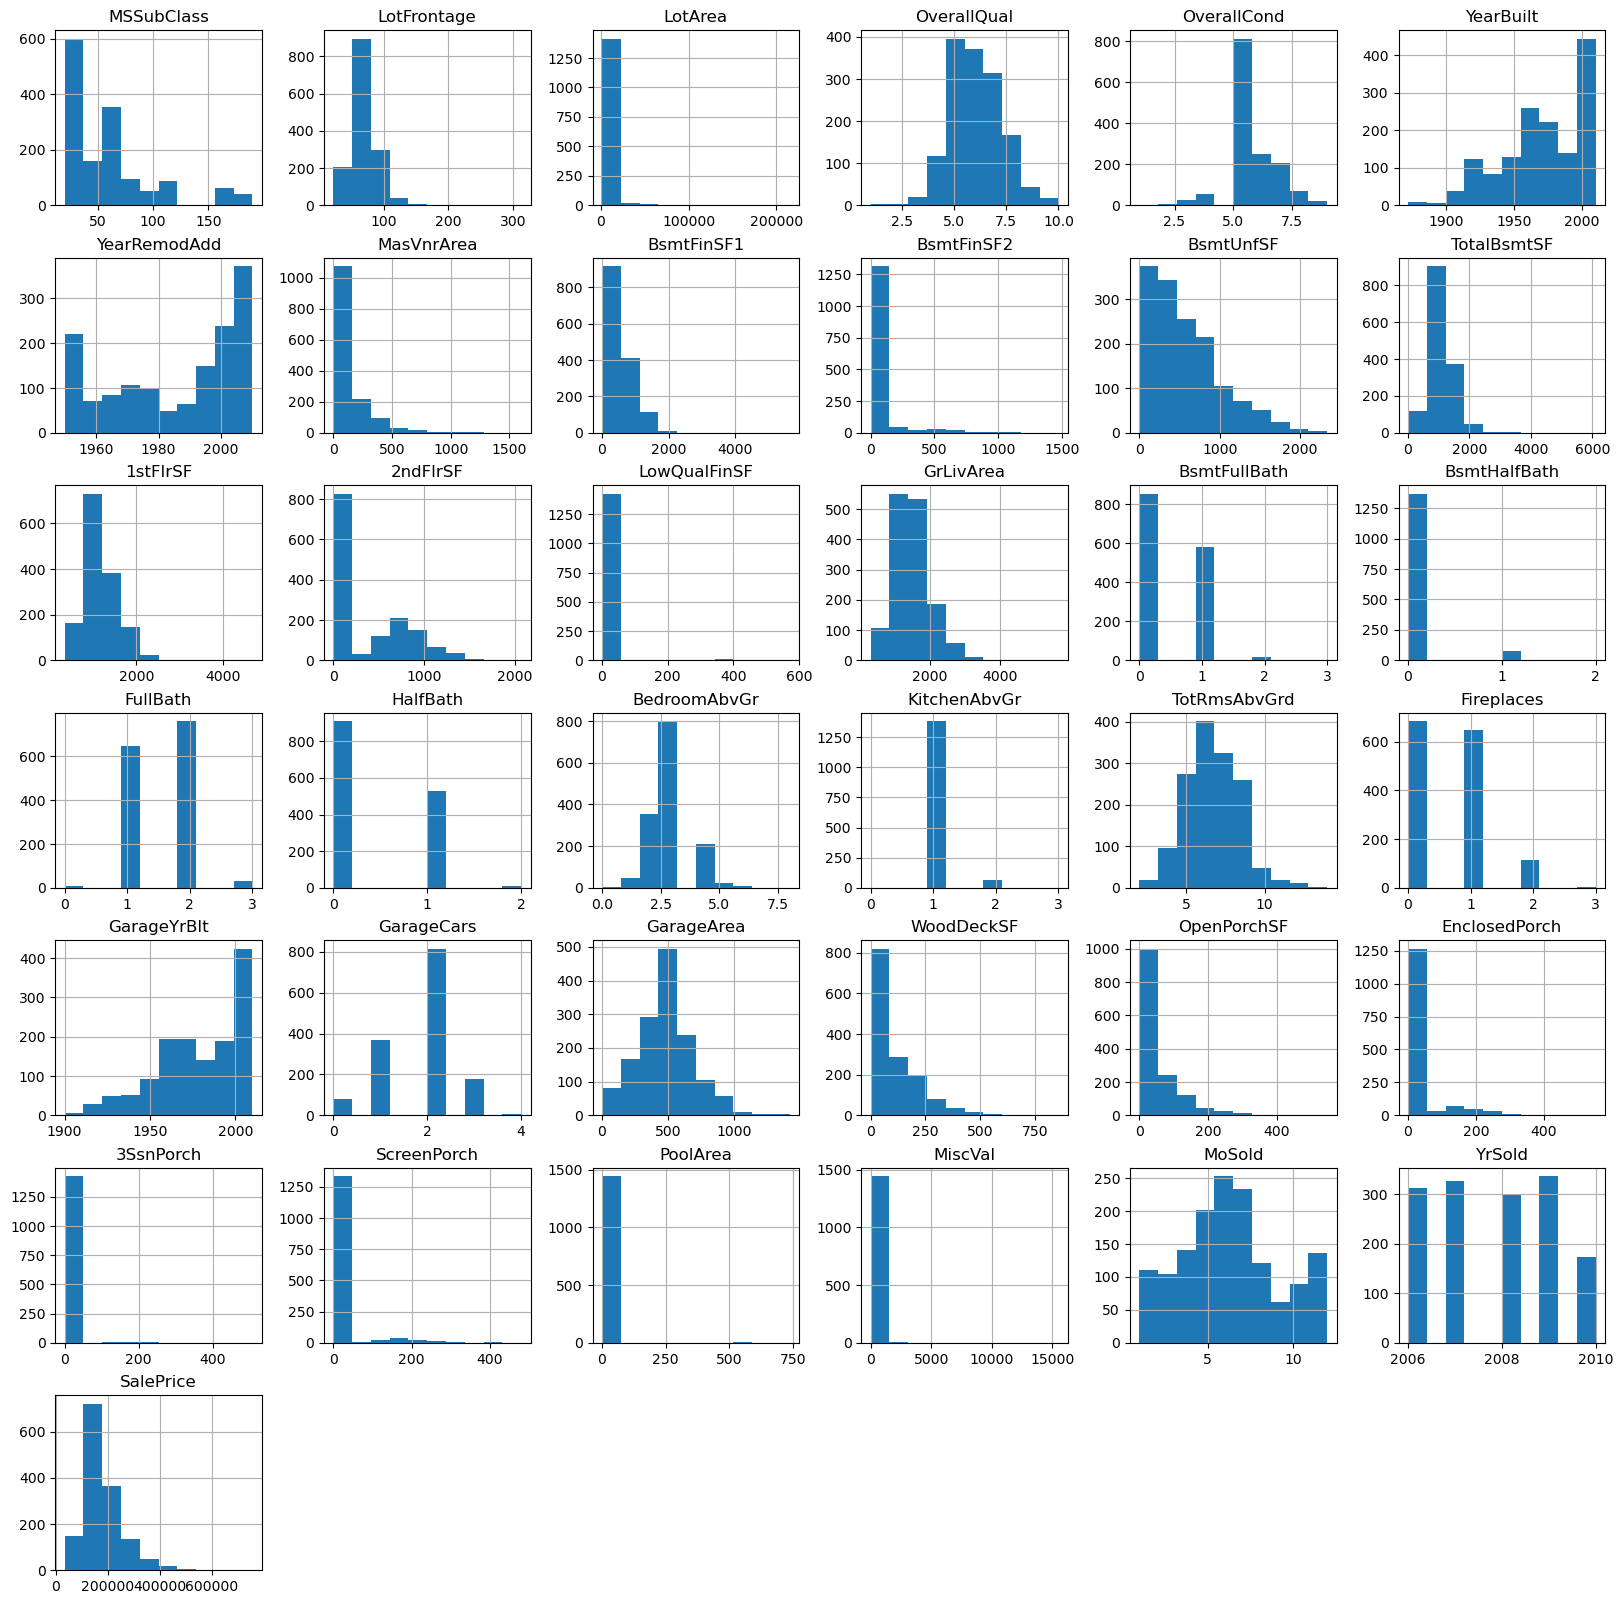

In [11]:
data.hist(figsize=(20, 20))
plt.show()

<AxesSubplot:>

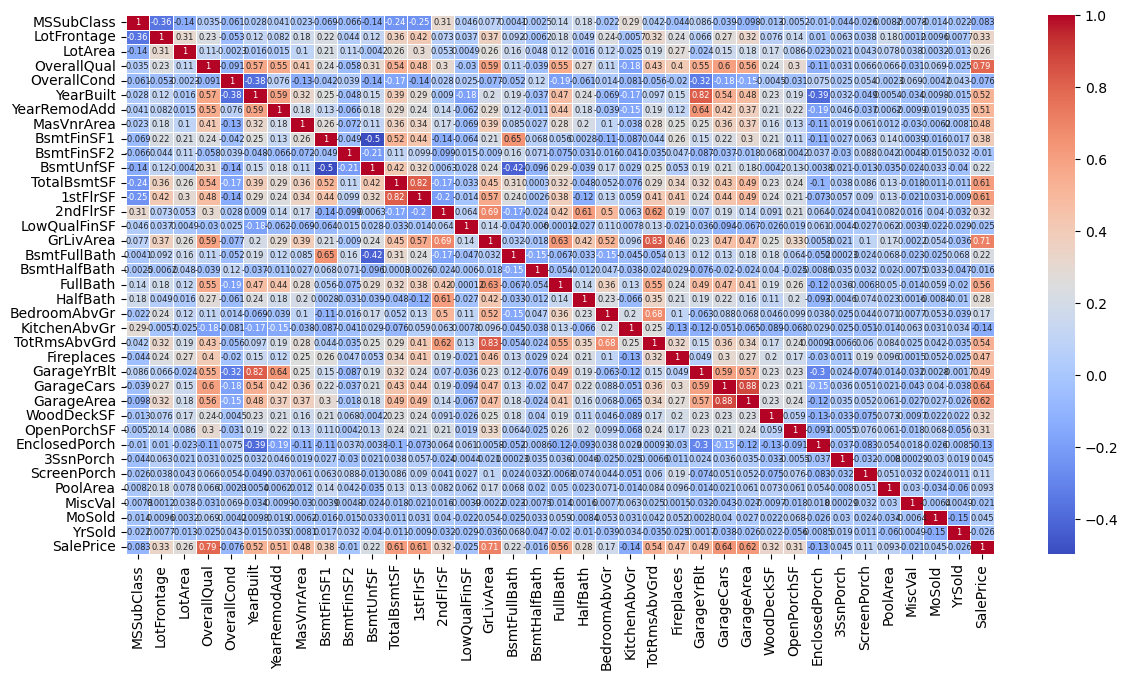

In [12]:
plt.figure(figsize=(14, 7))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 6},cmap='coolwarm', linewidths=.5)

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


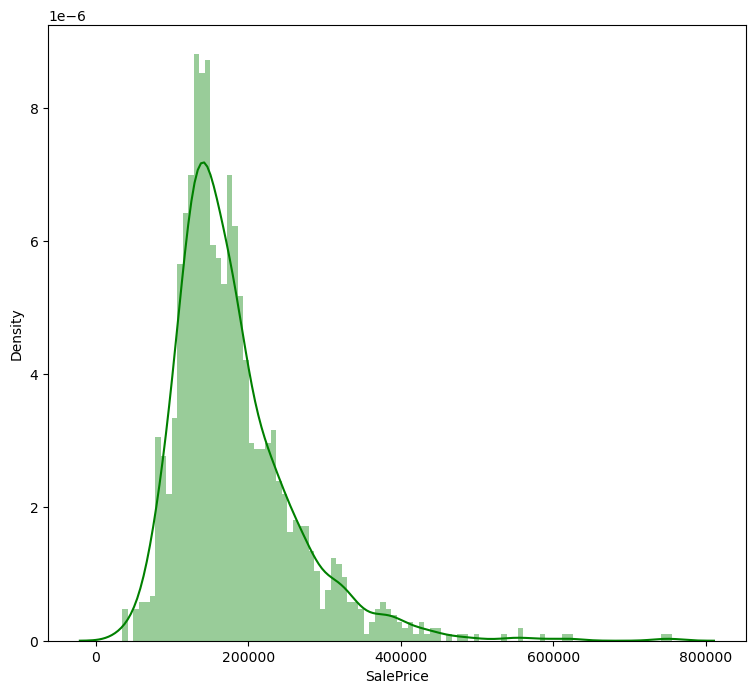

In [13]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

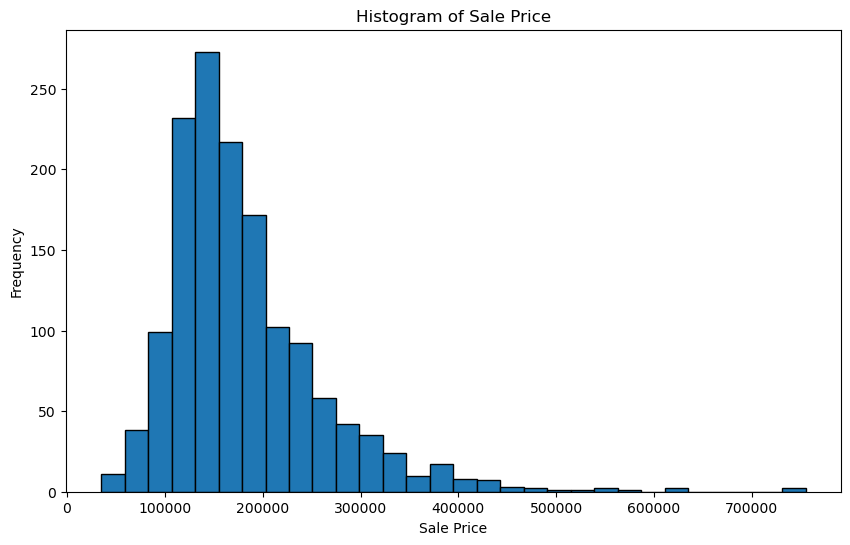

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data['SalePrice'], bins=30, edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')
plt.show()

In [15]:
correlation_matrix = pd.DataFrame.corr(data) 
correlation_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.355380,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,...,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.355380,1.000000,0.306871,0.232707,-0.052513,0.117293,0.082323,0.179770,0.217175,0.043675,...,0.075996,0.135252,0.010157,0.062572,0.038006,0.181349,0.001214,0.009559,0.007661,0.333341
LotArea,-0.138039,0.306871,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,...,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,0.034799,0.232707,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,...,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,-0.061147,-0.052513,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,...,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,0.027979,0.117293,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,...,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,0.040664,0.082323,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,...,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,0.023156,0.179770,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,...,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.069241,0.217175,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,...,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,-0.016387,0.016969,0.383995
BsmtFinSF2,-0.066037,0.043675,0.111674,-0.058211,0.039234,-0.047609,-0.066485,-0.072443,-0.049498,1.000000,...,0.067684,0.004155,0.036680,-0.030211,0.088430,0.041597,0.004784,-0.014977,0.031880,-0.010350


In [16]:
upper_bound_threshold, lower_bound_threshold = 0.8, -0.3
# Find features with high correlation scores
high_corr_features = np.where(correlation_matrix > upper_bound_threshold)
neg_corr_features = np.where(correlation_matrix < lower_bound_threshold)
high_corr_features = [(correlation_matrix.columns[i], correlation_matrix.columns[j])
                      for i, j in zip(*high_corr_features) if i != j]
neg_corr_features = [(correlation_matrix.columns[i], correlation_matrix.columns[j])
                      for i, j in zip(*neg_corr_features) if i != j]
# Convert to a set of unique features
high_corr_features = set(feature for pair in high_corr_features for feature in pair)
neg_corr_features = set(feature for pair in neg_corr_features for feature in pair)
# Remove high correlated features from the dataset
data_without_high_corr = data.drop(columns=high_corr_features)
# data_without_high_corr = data_without_high_corr.drop(columns=neg_corr_features.difference(high_corr_features))

> Based on the diagrams above, I select sub-category to remove outliers. Because the number of data rows is not much, I will only select 3 columns (features) to remove outlier: RoofStyle (Gable), BsmtCond (TA), SaleCondition (Abnorml).

In [17]:
# Function to remove outlier without object features
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) # Q1
    q3 = df_in[col_name].quantile(0.75) # Q3
    iqr = q3-q1 # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

removed_outlier_data = remove_outlier(data_without_high_corr, 'SalePrice') 
target = removed_outlier_data.SalePrice

### 5. MODEL CREATION:

In [18]:
y = data.SalePrice
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1451, dtype: int64


In [19]:
X=data[['LotArea', 'YearBuilt','TotalBsmtSF' ,'1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','GarageArea','GrLivArea','MSSubClass','OverallCond']]
Y=data['SalePrice']

In [20]:
X

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond
0,8450,2003,856,856,854,2,3,8,548,1710,60,5
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8
2,11250,2001,920,920,866,2,3,6,608,1786,60,5
3,9550,1915,756,961,756,1,3,7,642,1717,70,5
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1999,953,953,694,2,3,7,460,1647,60,5
1456,13175,1978,1542,2073,0,2,3,7,500,2073,20,6
1457,9042,1941,1152,1188,1152,2,4,9,252,2340,70,9
1458,9717,1950,1078,1078,0,1,2,5,240,1078,20,6


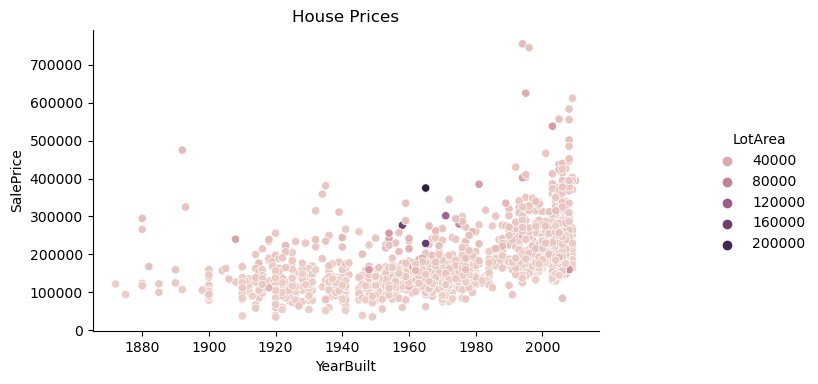

In [21]:
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline
g = sns.pairplot(data = data[['LotArea','SalePrice', 'YearBuilt','TotalBsmtSF' ,'1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','GarageArea','GrLivArea','MSSubClass','OverallCond']],
             x_vars = ['YearBuilt'],y_vars = 'SalePrice',aspect=1.5 ,hue='LotArea')
g.fig.set_size_inches(9,4)

plt.title('House Prices')
plt.show()

## (i) CATBOOST method

Let's choose a defining column and columns for training

In [22]:
defining_column = ['SalePrice']

In [23]:
X_train_DF = data.iloc[:,:-1]
Y_train_DF = data[defining_column]

In [24]:
!pip install catboost

     -------------------------------------- 101.0/101.0 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [25]:
#Let's use the CatBoost method. Let's call the model preliminary_model
import random
from catboost import CatBoostRegressor
preliminary_model = CatBoostRegressor(depth = 7, iterations = 70, l2_leaf_reg = 5, learning_rate = 0.1)


In [26]:
#Train the model:


preliminary_model.fit(X_train_DF,Y_train_DF)

0:	learn: 74760.1564265	total: 146ms	remaining: 10.1s
1:	learn: 70742.7623373	total: 149ms	remaining: 5.07s
2:	learn: 66631.7522509	total: 152ms	remaining: 3.39s
3:	learn: 63062.5199126	total: 153ms	remaining: 2.53s
4:	learn: 59840.8268006	total: 156ms	remaining: 2.03s
5:	learn: 56402.4819693	total: 159ms	remaining: 1.69s
6:	learn: 53651.5703389	total: 162ms	remaining: 1.46s
7:	learn: 51243.5906415	total: 165ms	remaining: 1.28s
8:	learn: 48715.5618938	total: 167ms	remaining: 1.13s
9:	learn: 46677.4555842	total: 170ms	remaining: 1.02s
10:	learn: 44717.7754805	total: 173ms	remaining: 928ms
11:	learn: 42912.5614612	total: 176ms	remaining: 849ms
12:	learn: 41442.9737628	total: 178ms	remaining: 783ms
13:	learn: 40016.7207175	total: 181ms	remaining: 724ms
14:	learn: 38618.9421294	total: 184ms	remaining: 676ms
15:	learn: 37446.8213321	total: 187ms	remaining: 632ms
16:	learn: 36287.9304360	total: 190ms	remaining: 593ms
17:	learn: 35306.3530035	total: 193ms	remaining: 558ms
18:	learn: 34452.832

In [27]:
#Let's predict the result on the training dataset

preliminary_model.predict(X_train_DF)

array([199224.74176868, 171959.95591415, 205390.51005056, ...,
       230461.07657055, 130032.33050636, 142909.53828614])

In [28]:
score = preliminary_model.score(X_train_DF,Y_train_DF)
print(f'Estimation of determination accuracy: {score*100:.2f}%')

Estimation of determination accuracy: 93.95%


## (ii) XGBRegressor method

In [29]:
X_train_DF_2 = data.iloc[:,:-1]
Y_train_DF_2 = data[defining_column]

In [30]:
#!pip install xgboost

In [31]:
#Let's use the XGBClassifier method. Let's call the model preliminary_model_2
from sklearn.neural_network import MLPRegressor
import xgboost as XGB
#from xgboost import XGBRegressor
preliminary_model_2 = XGB.XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.1,
                                       max_depth = 4, n_estimators = 200, reg_alpha = 0.0001,
                                       subsample = 0.7, objective='reg:linear', nthread=-1,
                                       scale_pos_weight=1, seed=27)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#Train model

preliminary_model_2.fit(X_train_DF_2,Y_train_DF_2)

In [ ]:
preliminary_model_2.predict(X_train_DF_2)

In [ ]:
score_2 = preliminary_model_2.score(X_train_DF_2,Y_train_DF_2)
print(f'Estimation of determination accuracy: {score_2*100:.2f}%')

## (iii) DECISION TREE method

In [ ]:
X_train_DF_3 = data.iloc[:,:-1]
Y_train_DF_3 = data[defining_column]

In [ ]:
# Let's use the Decision Trees method. Let's call the model preliminary_model_3
from sklearn import tree
from sklearn.tree import export_graphviz
preliminary_model_3 = tree.DecisionTreeRegressor()
parameters_3 = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}
grid_CV_3 = GridSearchCV(preliminary_model_3,parameters_3,cv = 5)

### For - ValueError: Input contains NaN, infinity or a value too large for dtype('float32'). We added mean in place of NAN

In [ ]:
X_test.fillna(X_train_DF_3.mean(), inplace=True)
Y_test.fillna(Y_train_DF_3.mean(), inplace=True)

In [ ]:
grid_CV_3.fit(X_test,Y_test)

In [ ]:
#Let's сhoosing the best model

preliminary_model_3 = grid_CV_3.best_estimator_

In [ ]:
print(f'Best classifier parameters:',grid_CV_3.best_params_)

In [ ]:
preliminary_model_3.predict(X_test)

In [ ]:
score_3 = preliminary_model_3.score(X_test,Y_test)
print(f'Estimation of determination accuracy: {score_3*100:.2f}%')

## Visualization of the Decision Trees method with parameters

In [ ]:
def visualize_DT_method_wp(clf,X,name):
  export_graphviz(clf,feature_names = X.columns, out_file = name + '.dot', filled = True)
  # use the exclamation mark to call the terminal"
  !dot -Tpng {name}.dot -o {name}.png
  display(Image(filename=name + '.png'))


In [ ]:
from IPython.display import Image, display
visualize_DT_method_wp(preliminary_model_3,X_test,'tree_wp');

## (iv) LINEAR REGRESSION model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train,Y_train)

In [ ]:
s=lr.predict(X_train)

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_train,s))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train,s)))
print('R_squared:',metrics.r2_score(Y_train,s))

## (v)Support Vector Classifier Model

In [ ]:
X_train_DF_4 = data.iloc[:,:-1]
Y_train_DF_4 = data[defining_column]

#### Let's use the Support Vector Regression method. Let's call the model preliminary_model_4

In [ ]:
from sklearn import svm

preliminary_model_4 = svm.SVR()

In [ ]:
X_test.fillna(X_train_DF_3.mean(), inplace=True)
Y_test.fillna(Y_train_DF_3.mean(), inplace=True)
#X_test.fillna(X_train_DF_3.median(), inplace=True)
#Y_test.fillna(Y_train_DF_3.median(), inplace=True)
preliminary_model_4.fit(X_test,Y_test)

In [ ]:
preliminary_model_4.predict(X_train)

In [ ]:
score_4 = preliminary_model_4.score(X_train,Y_train)
print(f'Estimation of determination accuracy: {score_4*100:.2f}%')

### CONCLUSION:

1.CATBOOST method-->Estimation of determination accuracy: 93.95%

2.XGBRegressor method-->Estimation of determination accuracy: 98.60% 

3.Decision trees method-->Estimation of determination accuracy: 94.00% 

4.Linear Regression method -->Estimation of determination accuracy: 74.09%

5.Support Vector Classifier method-->Estimation of determination accuracy: -6.68%

> **Conclustion:** top 3 models with the highest efficiency based on score of test set.
> > Top 1: GradientBoostingRegressor

> > Top 2: Decision trees method

> > Top 3: CATBOOST method